**2017.12.02 - work log - prelim - R network analysis - igraph**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#R-network-analysis-files" data-toc-modified-id="R-network-analysis-files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>R network analysis files</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Setup----working-directories" data-toc-modified-id="Setup----working-directories-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Setup -  working directories</a></span></li><li><span><a href="#Setup---import-SNA-functions" data-toc-modified-id="Setup---import-SNA-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup - import SNA functions</a></span></li><li><span><a href="#Setup---network-data---render-and-store-network-data" data-toc-modified-id="Setup---network-data---render-and-store-network-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Setup - network data - render and store network data</a></span><ul class="toc-item"><li><span><a href="#data---grp_month" data-toc-modified-id="data---grp_month-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>data - grp_month</a></span></li></ul></li><li><span><a href="#Setup---load-workspace-(optional)" data-toc-modified-id="Setup---load-workspace-(optional)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Setup - load workspace (optional)</a></span></li></ul></li><li><span><a href="#grp_month-analysis" data-toc-modified-id="grp_month-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>grp_month</code> analysis</a></span><ul class="toc-item"><li><span><a href="#grp_month-(gm)---automated---OpenCalais" data-toc-modified-id="grp_month-(gm)---automated---OpenCalais-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>grp_month</code> (gm) - automated - OpenCalais</a></span><ul class="toc-item"><li><span><a href="#Initialize-igraph" data-toc-modified-id="Initialize-igraph-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Initialize igraph</a></span></li><li><span><a href="#Calculate-some-basic-metrics" data-toc-modified-id="Calculate-some-basic-metrics-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Calculate some basic metrics</a></span></li><li><span><a href="#More-metrics" data-toc-modified-id="More-metrics-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>More metrics</a></span></li></ul></li><li><span><a href="#grp_month-(gm)---human" data-toc-modified-id="grp_month-(gm)---human-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>grp_month</code> (gm) - human</a></span><ul class="toc-item"><li><span><a href="#Initialize-igraph" data-toc-modified-id="Initialize-igraph-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Initialize igraph</a></span></li><li><span><a href="#Calculate-some-basic-metrics" data-toc-modified-id="Calculate-some-basic-metrics-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Calculate some basic metrics</a></span></li><li><span><a href="#More-metrics" data-toc-modified-id="More-metrics-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>More metrics</a></span></li></ul></li></ul></li><li><span><a href="#Save-workspace-image" data-toc-modified-id="Save-workspace-image-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save workspace image</a></span></li></ul></div>

# R network analysis files

- Back to [Table of Contents](#Table-of-Contents)

Related files:

* network descriptives
    * network-level
        
        * files
            
            * R scripts:
                
                * `sourcenet/R/db_connect.r`
                * `sourcenet/R/sna/functions-sna.r`
                * `sourcenet/R/sna/sna-load_data.r`
                * `sourcenet/R/sna/igraph/*`
                * `sourcenet/R/sna/statnet/*`
        
        * statnet/sna
            
            * `sna::gden()` - graph density
            * R scripts:
                
                * `sourcenet/R/sna/statnet/sna-statnet-init.r`
                * `sourcenet/R/sna/statnet/sna-statnet-network-stats.r`
                * `sourcenet/R/sna/statnet/sna-qap.r`
        
        * igraph
            
            * `igraph::transitivity()` - vector of transitivity scores for each node in a graph, plus network-level transitivity score.
                
                * Q - interpretation?
                
            * R scripts:
                
                * `sourcenet/R/sna/statnet/sna-igraph-init.r`
                * `sourcenet/R/sna/statnet/sna-igraph-network-stats.r`


# Setup

- Back to [Table of Contents](#Table-of-Contents)

## Setup -  working directories

- Back to [Table of Contents](#Table-of-Contents)

Store important directories and file names in variables:

In [1]:
getwd()

[1] "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work"

In [4]:
# code files (in particular SNA function library, modest though it may be)
code_directory = "/home/jonathanmorgan/work/sourcenet/django/research/sourcenet_analysis/R/sna"
sna_function_file_path = paste( code_directory, "/", 'functions-sna.r', sep = "" )

# home directory
home_directory = getwd()
home_directory = "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work"

# data directories
data_directory = paste( home_directory, "/data", sep = "" )
workspace_file_name = "igraph-grp_month.RData"
workspace_file_path = paste( data_directory, "/", workspace_file_name )

In [5]:
# set working directory to data directory for now.
setwd( data_directory )
getwd()

[1] "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data"

## Setup - import SNA functions

- Back to [Table of Contents](#Table-of-Contents)

source the file `functions-sna.r`.

In [6]:
source( sna_function_file_path )

## Setup - network data - render and store network data

- Back to [Table of Contents](#Table-of-Contents)

First, need render to render network data and upload it to your server.

Directions for rendering network data are in [2017.11.14-work_log-prelim-network_analysis.ipynb](2017.11.14-work_log-prelim-network_analysis.ipynb).  You want a tab-delimited matrix that includes both the network and attributes of nodes as columns, and you want it to include a header row.

Once you render your network data files, you should place them on the server.

High level data file layout:

- tab-delimited.
- first row and first column are labels
- last 2 columns are traits of nodes (`person_id` and `person_type`)
- each row and column after first until the trait columns represents a person found in one of the articles.
- The people are in the same order from top to bottom and left to right.
- Where the row and column of two people meet, and one of the people is an author, the nunber in the cell where they meet is the number of times the non-author was quoted in an article by the author.  Does not include more basic two-mode co-location ties (appeared in same article, even if not an author and/or not quoted).

Files and their location on server:

### data - grp_month

- Back to [Table of Contents](#Table-of-Contents)

This is data from the Grand Rapids Press articles from December of 2009, coded by both humans and OpenCalais.

Files:

- automated full month - `sourcenet_data-20171115-043151-grp_month-automated.tab`
- automated week subset - `sourcenet_data-20171115-043246-grp_month-automated-week_subset.tab`
- human full month - `sourcenet_data-20171115-043102-grp_month-human.tab`
- human week subset - `sourcenet_data-20171115-043404-grp_month-human-week_subset.tab`

Location in Dropbox: `Dropbox/academia/MSU/program_stuff/prelim_paper/data/network_analysis/2017.11.14/network/new_coders/grp_month`

Location on server: `/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month`

## Setup - load workspace (optional)

- Back to [Table of Contents](#Table-of-Contents)

If you want, you can load this file's workspace, from a previous run:

In [ ]:
# assumes that you've already set working directory above to the
#     working directory.
setwd( data_directory )
load( workspace_file_name )

# `grp_month` analysis

- Back to [Table of Contents](#Table-of-Contents)

First, look at the shiny new month of data.

## `grp_month` (gm) - automated - OpenCalais

- Return to [Table of Contents](#Table-of-Contents)

First, we'll analyze the month of data coded by OpenCalais.  Set up some variables to store where data is located:

In [7]:
# initialize variables
gmAutomatedDataFolder <- paste( data_directory, "/network/grp_month", sep = "" )
gmAutomatedDataFile <- "sourcenet_data-20171205-022551-grp_month-automated.tab"
gmAutomatedDataPath <- paste( gmAutomatedDataFolder, "/", gmAutomatedDataFile, sep = "" )

In [9]:
gmAutomatedDataPath

[1] "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month/sourcenet_data-20171205-022551-grp_month-automated.tab"

Load the data file into memory

In [10]:
# tab-delimited:
gmAutomatedDataDF <- read.delim( gmAutomatedDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [11]:
# get count of rows...
gmAutomatedRowCount <- nrow( gmAutomatedDataDF )
paste( "grp_month automated row count = ", gmAutomatedRowCount, sep = "" )

# ...and columns
gmAutomatedColumnCount <- ncol( gmAutomatedDataDF )
paste( "grp_month automated column count = ", gmAutomatedColumnCount, sep = "" )

[1] "grp_month automated row count = 1167"

[1] "grp_month automated column count = 1169"

Get just the tie rows and columns for initializing network libraries.

In [12]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
gmAutomatedNetworkDF <- gmAutomatedDataDF[ , 1 : gmAutomatedRowCount ]
#str( gmAutomatedNetworkDF )

In [13]:
# convert to a matrix
gmAutomatedNetworkMatrix <- as.matrix( gmAutomatedNetworkDF )
# str( gmAutomatedNetworkMatrix )

### Initialize igraph

- Back to [Table of Contents](#Table-of-Contents)

First, load the igraph package.

Once we get the data into an igraph object, run the code in the following for more in-depth information:

* `sourcenet/R/sna/statnet/sna-igraph-init.r`
* `sourcenet/R/sna/statnet/sna-igraph-network-stats.r`


In [14]:
#install.packages( "igraph" )
library( igraph )


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



Load our data matrix into an igraph object.

In [15]:
# load data into igraph instance.
gmAutomatedNetworkIgraph <- graph.adjacency( gmAutomatedNetworkMatrix, mode = "undirected", weighted = TRUE )

In [16]:
# add person_id (column 1168)
personIdColumnNumber <- 1168

# first, get just the data frame column with person ID:
personIdsColumn <- gmAutomatedDataDF[ , personIdColumnNumber ]

# populate list we will use to set node person_ID attribute

# Don't just do these - they don't convert to simple list/vector, contain remnants of data frame
#personIdsList <- personIdsColumn
#personIdsList <- c( personIdsColumn )

# Convert to a list of numbers.
personIdsList <- as.numeric( personIdsColumn )

# Try this if you have character attribute...
#personTypesList <- unname( unlist( personTypesColumn ) )

# set vertex/node attribute person_id
V( gmAutomatedNetworkIgraph )$person_id <- personIdsList

# OR use function:
#gmAutomatedNetworkIgraph <- set.vertex.attribute( gmAutomatedNetworkIgraph, "person_id", value = personIdsList )

# look at graph and person_type attribute values
gmAutomatedNetworkIgraph
V( gmAutomatedNetworkIgraph )$person_id


IGRAPH 36e7505 UNW- 1167 1153 -- 
+ attr: name (v/c), person_id (v/n), weight (e/n)
+ edges from 36e7505 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--308__589__source-3  1__3__author-2--348__774__source-3 
 [9] 1__3__author-2--368__1080__source-3 1__3__author-2--388__1419__source-3
[11] 1__3__author-2--393__1451__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
[15] 1__3__author-2--808__2271__source-3 1__3__author-2--809__2272__source-3
+ ... omitted several edges

[1]    3   12   13   15   23   24   25   29   30   32   36   37   46   51
  [15]   53   66   69   73   74   84  100  102  131  132  137  138  161  162
  [29]  163  164  165  166  172  173  174  175  176  178  179  180  181  182
  [43]  184  187  188  204  213  215  217  218  219  223  225  234  236  237
  [57]  239  250  268  269  271  272  273  274  275  276  277  289  290  292
  [71]  295  302  305  307  308  309  310  311  312  319  320  321  322  323
  [85]  324  325  326  327  328  329  330  331  332  333  334  335  336  337
  [99]  338  339  340  343  344  345  346  347  349  350  351  352  353  354
 [113]  355  356  357  358  360  361  362  363  364  365  366  367  368  369
 [127]  370  371  372  373  374  375  376  377  378  379  380  381  382  383
 [141]  384  385  386  387  388  389  390  391  392  393  394  395  396  397
 [155]  398  399  400  401  402  403  404  405  406  407  408  410  411  412
 [169]  413  414  415  416  417  418  419  425  437  438  439  440  441  442
 [183]  443  444  445  446  447  448  449  450  451  452  453  454  455  456
 [197]  460  461  462  463  464  466  467  468  469  470  471  472  473  474
 [211]  475  476  477  478  479  480  481  482  484  485  486  487  488  489
 [225]  490  491  498  499  500  501  502  503  505  506  507  508  509  510
 [239]  511  512  513  514  515  516  517  518  519  520  521  522  523  524
 [253]  525  526  527  528  529  530  531  532  534  535  536  537  538  539
 [267]  541  542  543  544  545  546  547  548  549  551  552  553  554  555
 [281]  556  557  558  559  560  561  562  563  564  565  566  567  568  569
 [295]  570  571  572  574  575  576  579  580  581  582  583  585  588  589
 [309]  591  598  599  617  618  620  633  637  652  654  660  664  668  669
 [323]  686  703  714  736  743  750  752  753  757  758  759  760  761  762
 [337]  763  764  765  766  767  768  769  770  771  772  773  774  775  776
 [351]  777  778  779  780  848  852  901  904  937  949  954  959  971 1043
 [365] 1044 1056 1059 1080 1082 1109 1113 1133 1152 1183 1203 1205 1206 1207
 [379] 1286 1287 1289 1298 1299 1318 1319 1343 1348 1419 1441 1442 1443 1445
 [393] 1451 1453 1457 1458 1476 1479 1544 1546 1547 1548 1576 1591 1642 1655
 [407] 1674 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697 1700 1703
 [421] 1704 1705 1707 1708 1711 1712 1713 1714 1717 1718 1719 1720 1721 1722
 [435] 1723 1724 1725 1726 1727 1728 1729 1730 1732 1733 1734 1735 1736 1737
 [449] 1739 1740 1741 1743 1745 1746 1747 1749 1750 1752 1753 1754 1756 1757
 [463] 1758 1759 1760 1761 1762 1765 1766 1767 1768 1769 1770 1772 1775 1778
 [477] 1779 1782 1783 1784 1786 1787 1793 1794 1795 1796 1798 1800 1801 1803
 [491] 1805 1806 1807 1808 1810 1811 1814 1815 1816 1817 1818 1819 1821 1823
 [505] 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837
 [519] 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851
 [533] 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865
 [547] 1866 1867 1871 1872 1873 1874 1875 1880 1882 1883 1884 1886 1888 1889
 [561] 1890 1891 1892 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1911
 [575] 1913 1931 1933 1955 1956 1960 1961 1962 1963 1964 1965 1966 1967 1972
 [589] 1973 1974 1977 1978 1979 1980 1981 1982 1983 1984 1986 1988 1990 1991
 [603] 1992 1994 1998 1999 2000 2001 2002 2003 2004 2008 2009 2012 2013 2014
 [617] 2015 2016 2018 2019 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031
 [631] 2032 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046
 [645] 2047 2048 2052 2054 2055 2056 2060 2064 2068 2069 2071 2073 2075 2076
 [659] 2077 2078 2079 2080 2081 2087 2091 2094 2095 2096 2097 2098 2099 2100
 [673] 2101 2102 2104 2105 2106 2107 2108 2110 2111 2112 2113 2114 2116 2118
 [687] 2119 2120 2121 2126 2127 2128 2129 2130 2131 2132 2134 2136 2137 2138
 [701] 2139 2140 2141 2142 2143 2144 2147 2148 2149 2150 2151 2152 2153 2154
 [715] 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2166 2167 2168 2169

In [17]:
# add person_type (column 1169)
personTypeColumnNumber <- 1169

# first, get just the data frame column with person type:
personTypesColumn <- gmAutomatedDataDF[ , personTypeColumnNumber ]

# populate list we will use to set node person_type attribute

# Don't just do these - they don't convert to simple list/vector, contain remnants of data frame
#personTypesList <- personTypesColumn
#personTypesList <- c( personTypesColumn )

# Convert to a list of numbers.
personTypesList <- as.numeric( personTypesColumn )

# Try this if you have character attribute...
#personTypesList <- unname( unlist( personTypesColumn ) )

# set vertex/node attribute person_type
V( gmAutomatedNetworkIgraph )$person_type <- personTypesList

# OR use function:
#test1_igraph <- set.vertex.attribute( test1_igraph, "person_type", value = person_types_list )

# look at graph and person_type attribute values
gmAutomatedNetworkIgraph
V( gmAutomatedNetworkIgraph )$person_type


IGRAPH 36e7505 UNW- 1167 1153 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), weight (e/n)
+ edges from 36e7505 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--308__589__source-3  1__3__author-2--348__774__source-3 
 [9] 1__3__author-2--368__1080__source-3 1__3__author-2--388__1419__source-3
[11] 1__3__author-2--393__1451__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
[15] 1__3__author-2--808__2271__source-3 1__3__author-2--809__2272__source-3
+ ... omitted several edges

[1] 2 3 2 3 2 3 3 2 2 3 2 3 2 3 3 2 2 2 2 2 3 3 3 3 3 3 2 1 3 3 3 3 3 3 3 3 3
  [38] 2 3 1 3 3 3 3 3 3 1 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 2 3 3
  [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 3 3
 [112] 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 1 3 3 2 3 3 3 3
 [149] 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 2 3 3 1 3 3 2 3 3
 [186] 3 3 3 3 3 3 3 3 3 3 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 2 3 3 3 3
 [223] 3 3 3 1 3 3 3 3 3 3 2 3 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 [260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1 3 1 3
 [297] 3 3 3 3 3 3 1 3 3 3 1 3 2 4 2 3 3 3 3 2 2 2 3 3 3 3 3 2 3 2 2 3 3 3 3 1 1
 [334] 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 1 3 3 1 1 3 3 1 1 3 3 3 3 3 2 3
 [371] 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 3 3 1 3 2 3
 [408] 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3
 [445] 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 2 3 3 3
 [482] 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [519] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [556] 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3
 [593] 1 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 1 3 2 3 3 3 3 3 3 3 3 3 3
 [630] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 1 3 3 3 1 1 3 3 3 3 3 3 3 3 3
 [667] 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3
 [704] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 3 3 3 3 1 1 3 1 1 3 1 1
 [741] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 1 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3
 [778] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3
 [815] 3 3 3 1 3 3 3 3 1 3 1 1 3 3 1 3 2 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 [852] 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [889] 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 [926] 1 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1
 [963] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
[1000] 3 3 3 3 3 3 3 3 2 3 3 3 1 3 3 1 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 1 3 3 2 3
[1037] 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1
[1074] 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1111] 1 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1148] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3

In [18]:
# to see count of nodes and edges, just type the object name:
gmAutomatedNetworkIgraph

# Will output something like:
#
# IGRAPH UNW- 314 309 --
# + attr: name (v/c), weight (e/n)
#
# in the first line, "UNW-" are traits of graph:
# - 1 - U = undirected ( directed would be "D" )
# - 2 - N = named or not ( "-" instead of "N" )
# - 3 - W = weighted
# - 4 - B = bipartite ( "-" = not bipartite )
# 314 is where node count goes, 309 is edge count.
# The second line gives you information about the 'attributes' associated with the graph. In this case, there are two attributes, name and weight.  Next to each attribute name is a two-character construct that looks like "(v/c)".  The first letter is the thing the attribute is associated with (g = graph, v = vertex or node, e = edge).  The second is the type of the attribute (c = character data, n = numeric data).  So, in this case:
# - name (v/c) - the name attribute is a vertex/node attribute - the "v" in "(v/c)" - where the values are character data - the "c" in "(v/c)".
# - weight (e/n) - the weight attribute is an edge attribute - the "e" in "(e/n)" - where the values are numeric data - the "n" in "(e/n)".
# - based on: http://www.shizukalab.com/toolkits/sna/sna_data

IGRAPH 36e7505 UNW- 1167 1153 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), weight (e/n)
+ edges from 36e7505 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--308__589__source-3  1__3__author-2--348__774__source-3 
 [9] 1__3__author-2--368__1080__source-3 1__3__author-2--388__1419__source-3
[11] 1__3__author-2--393__1451__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
[15] 1__3__author-2--808__2271__source-3 1__3__author-2--809__2272__source-3
+ ... omitted several edges

### Calculate some basic metrics

- Back to [Table of Contents](#Table-of-Contents)

In [22]:
# try calling the degree() function on an igraph object.  Returns a number vector with names.
gmAutomatedDegreeVector <- igraph::degree( gmAutomatedNetworkIgraph )

# For help with igraph::degree function:
#??igraph::degree

# calculate the mean of the degrees.
gmAutomatedAvgDegree <- mean( gmAutomatedDegreeVector )
paste( "average degree = ", gmAutomatedAvgDegree, sep = "" )

# append the degrees to the network as a vertex attribute.
V( gmAutomatedNetworkIgraph )$degree <- gmAutomatedDegreeVector

# also add degree vector to original data frame
gmAutomatedDataDF$degree <- gmAutomatedDegreeVector

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output igraph object to see what attributes you have
gmAutomatedNetworkIgraph
V( gmAutomatedNetworkIgraph )$degree

[1] "average degree = 1.97600685518423"

IGRAPH 36e7505 UNW- 1167 1153 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), degree (v/n),
| weight (e/n)
+ edges from 36e7505 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--308__589__source-3  1__3__author-2--348__774__source-3 
 [9] 1__3__author-2--368__1080__source-3 1__3__author-2--388__1419__source-3
[11] 1__3__author-2--393__1451__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
+ ... omitted several edges

[1] 30  1 39  1 34  1  1 50 26  1 29  1 47  1  1 93 46 29 47 71  2  9  1  1
  [25]  2  1 35  0  2  2  2  2  1  1  1  1  1 42  1  0  1  2  2  1  5  1  0  1
  [49] 43  5  1 14  1  1  2  2  1  2  1  1  1  1  1  1  0  1  0  2  4  1  1 32
  [73]  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1  1
  [97]  9  2  1  1  1  1  1  2  5  0  0  0  0  1  1  1  0  1  1  2  0  2  2  1
 [121]  1  1  1  1  2  1  1  1  1  1  0  1  1 35  1  1  1  1  1  1  0  1  1 19
 [145]  1  1  1  1  1  1 27  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1
 [169]  1  1  1  1  4  1  1 32 49  1  2  0  1  1 44  1  1  1  1  1  1  1  2  1
 [193]  1  2  1  1  4  0  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  0  2  2
 [217]  1  1  1  1  1  4  1  1  1  0  1  1  1  1  2  1 15  1  0  1  1  2  2  2
 [241]  2  2  2  4  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1
 [265]  1  1  1  1  1  1  1  1  1  1  0  0  2  2  2  2  1  1  2  1  1  1  1  1
 [289]  1  1  2  1  0  2  0  1  2  3  1  1  1  1  0  1  1  1  0  1 72 24 46  3
 [313]  1  1  1 10  8  2  1  1  2  1  1  2  1  2  2  1  1  1  1  0  0  0  1  2
 [337]  1  1  1  1  1  1  2  1  0  1  1  1  1  1  1  0  1  1  0  1  1  0  0  1
 [361]  1  0  0  1  1  1  3  2 15  1  1  1  1  0  2  1  0  1  1  1  1  1  1  1
 [385]  1  2  1  2  1  1  1  0  1  0  0  1  1  1  1  1  1  2  1  0  1  7  1  1
 [409]  1  1  1  1  1  0  1  0  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [433]  1  1  1  0  1  1  1  1  1  3  2  4  2  1  2  2  1  1  1  1  1  0  1  1
 [457]  0  1  1  1  1  1  1  1  1  1  1  1  0  1  0  1  1  1  1  2  1  4  1  1
 [481]  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1
 [505]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [529]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [553]  1  1  1  1  1  1  1  1  1  1  2  0  1  1  1  1  1  1  1  1  1  1  1  1
 [577]  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  0  2  1  0  1  1  1  0
 [601]  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  0  1  5  1  1  1  1  1
 [625]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  2  2
 [649]  0  2  2  0  1  1  1  0  0  1  1  1  1  1  1  1  1  4  1  1  1  1  1  1
 [673]  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1
 [697]  0  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1
 [721]  1  1  0  0  0  1  1  1  1  1  1  1  0  0  1  0  0  1  0  0  1  1  1  1
 [745]  1  1  1  1  1  1  1  1  1  1  0  1  1  2  1  0  1  0  1  1  1  0  1  1
 [769]  1  1  1  0  2  2  2  2  2  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
 [793]  1  0  2  1  1  1  1  1  1  1  2  1  1  1  0  1  1  1  1  1  0  1  1  1
 [817]  1  0  1  1  1  1  0  1  0  0  1  1  0  1  3  2  1  1  1  2  1  0  1  1
 [841]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  0  1  1  1  1
 [865]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [889]  1  1  1  1  1  0  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1
 [913]  1  1  1  1  1  1  1  0  1  1  1  1  1  0  0  1  1  1  1  1  1  1  0  1
 [937]  1  1  1  1  1  1  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [961]  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  1  0
 [985]  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  0
[1009]  1  1  1  0  1  1  0  1  1  1  1  0  1  1  0  1  1  1  1  1  1  1  1  0
[1033]  1  1  6  1  1  1  1  2  1  1  1  1  1  2  2  0  2  2  1  1  1  1  1  1
[1057]  1  0  1  1  1  1  1  1  1  1  2  0  2  2  2  1  0  1  1  1  1  1  0  1
[1081]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[1105]  1  1  1  1  1  1  0  1  2  2  2  2  2  2  2  1  1  1  0  0  1  1  1  1
[1129]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  1  1  1
[1153]  1  1  1  1  1  1  2  2  1  1  2  0  1  0  1

Calculate average source and author degree:

In [21]:
# average author degree (person types 2 and 4)
gmAutomatedAverageAuthorDegree2And4 <- calcAuthorMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = TRUE )
paste( "average author degree (2 and 4) = ", gmAutomatedAverageAuthorDegree2And4, sep = "" )

# average author degree (person type 2 only)
gmAutomatedAverageAuthorDegreeOnly2 <- calcAuthorMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = FALSE )
paste( "average author degree (only 2) = ", gmAutomatedAverageAuthorDegreeOnly2, sep = "" )

# average source degree (person types 3 and 4)
gmAutomatedAverageSourceDegree3And4 <- calcSourceMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = TRUE )
paste( "average source degree (3 and 4) = ", gmAutomatedAverageSourceDegree3And4, sep = "" )

# average source degree (person type 3 only)
gmAutomatedAverageSourceDegreeOnly3 <- calcSourceMeanDegree( dataFrameIN = gmAutomatedDataDF, includeBothIN = FALSE )
paste( "average source degree (only 3) = ", gmAutomatedAverageSourceDegreeOnly3, sep = "" )


[1] "average author degree (2 and 4) = 24.8297872340426"

[1] "average author degree (only 2) = 24.8478260869565"

[1] "average source degree (3 and 4) = 1.163"

[1] "average source degree (only 3) = 1.14014014014014"

### More metrics

- Back to [Table of Contents](#Table-of-Contents)

Once we get the data into an igraph object, run the code in the following for more in-depth information:

    sourcenet/R/sna/statnet/sna-igraph-init.r
    sourcenet/R/sna/statnet/sna-igraph-network-stats.r

[1] "degree mean = 1.97600685518423"

[1] "degree SD = 6.43021172327381"

[1] "degree Variance = 6.43021172327381"

[1] "degree Max Value = 6.43021172327381"

IGRAPH 36e7505 UNW- 1167 1153 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), degree (v/n),
| transitivity (v/n), weight (e/n)
+ edges from 36e7505 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--308__589__source-3  1__3__author-2--348__774__source-3 
 [9] 1__3__author-2--368__1080__source-3 1__3__author-2--388__1419__source-3
[11] 1__3__author-2--393__1451__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
+ ... omitted several edges

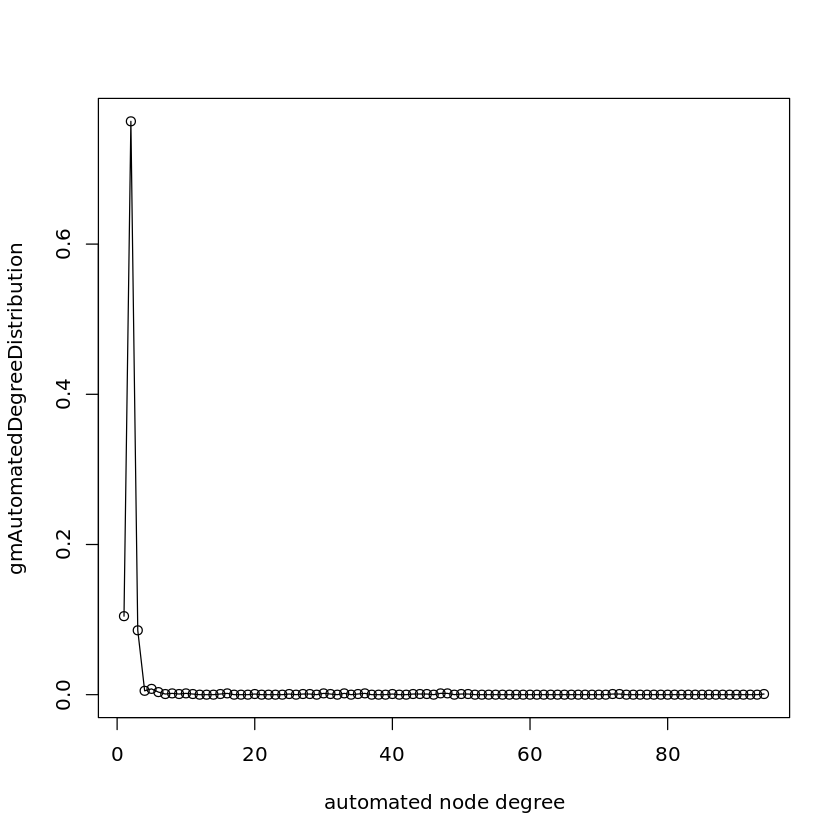

In [23]:
# First, need to load SNA functions and load data into statnet network object.
#    For more details on that, see the files "functions-sna.r",
#    "sna-load_data.r" and "sna-igraph_init.r".
#
# assumes that working directory for statnet is sourcenet/R/igraph
# setwd( ".." )
# source( "functions-sna.r" )
# source( "sna-load_data.r" )
# setwd( "igraph" )
# source( "sna-igraph-init.r" )

# results in (among other things):
# - humanNetworkData - data frame with human-generated network data matrix in it, including columns on the right side for any node-specific attributes.
# - calaisNetworkData - data frame with computer-generated network data matrix in it, including columns on the right side for any node-specific attributes.
# - humanNetworkTies - data frame with only human-generated network data matrix in it, no node-specific attributes.
# - calaisNetworkTies - data frame with only computer-generated network data matrix in it, no node-specific attributes.
# - humanNetworkMatrix - matrix with only human-generated network data matrix in it, no node-specific attributes.
# - calaisNetworkMatrix - matrix with only computer-generated network data matrix in it, no node-specific attributes.
# - humanNetworkIgraph - igraph network with human-coded network in it, including node-specific attributes.
# - calaisNetworkIgraph - igraph network with computer-coded network in it, including node-specific attributes.

# Links:
# - CRAN page: http://cran.r-project.org/web/packages/igraph/index.html
# - Manual (PDF): http://cran.r-project.org/web/packages/igraph/igraph.pdf
# - intro.: http://horicky.blogspot.com/2012/04/basic-graph-analytics-using-igraph.html
# - good notes: http://www.shizukalab.com/toolkits/sna/node-level-calculations

# Also, be advised that statnet and igraph don't really play nice together.
#    If you'll be using both, best idea is to have a workspace for each.

#==============================================================================#
# igraph
#==============================================================================#

# Good notes:
# - http://assemblingnetwork.wordpress.com/2013/06/10/network-basics-with-r-and-igraph-part-ii-of-iii/

# make sure you've loaded the igraph library
# install.packages( "igraph" )
library( igraph )

#==============================================================================#
# NODE level
#==============================================================================#

# calculate the mean of the degrees.
gmAutomatedDegreeMean <- gmAutomatedAvgDegree
paste( "degree mean = ", gmAutomatedDegreeMean, sep = "" )

# what is the standard deviation of these degrees?
gmAutomatedDegreeSd <- sd( gmAutomatedDegreeVector )
paste( "degree SD = ", gmAutomatedDegreeSd, sep = "" )

# what is the variance of these degrees?
gmAutomatedDegreeVar <- var( gmAutomatedDegreeVector )
paste( "degree Variance = ", gmAutomatedDegreeSd, sep = "" )

# what is the max value among these degrees?
gmAutomatedDegreeMax <- max( gmAutomatedDegreeVector )
paste( "degree Max Value = ", gmAutomatedDegreeSd, sep = "" )

# calculate and plot degree distributions
gmAutomatedDegreeFrequenciesTable <- table( gmAutomatedDegreeVector )
gmAutomatedDegreeDistribution <- igraph::degree.distribution( gmAutomatedNetworkIgraph )
plot( gmAutomatedDegreeDistribution, xlab = "automated node degree" )
lines( gmAutomatedDegreeDistribution )

# subset vector to get only those that are above mean
gmAutomatedAboveMeanVector <- gmAutomatedDegreeVector[ gmAutomatedDegreeVector > gmAutomatedDegreeMax ]

# node-level transitivity
# create transitivity vectors.
gmAutomatedTransitivityVector <- igraph::transitivity( gmAutomatedNetworkIgraph, type = "local" )

# append the transitivity to the network as a vertex attribute.
V( gmAutomatedNetworkIgraph )$transitivity <- gmAutomatedTransitivityVector

# also add transitivity vector to original data frame
gmAutomatedDataDF$transitivity <- gmAutomatedTransitivityVector


# And, if you want averages of these:
gmAutomatedMeanTransitivity <- mean( gmAutomatedTransitivityVector, na.rm = TRUE )

#==============================================================================#
# NETWORK level
#==============================================================================#

# graph-level degree centrality
gmAutomatedDegreeCentrality <- igraph::centralization.degree( gmAutomatedNetworkIgraph )

# graph-level undirected betweenness
gmAutomatedBetweennessCentrality <- igraph::centralization.betweenness( gmAutomatedNetworkIgraph, directed = FALSE )

# node-level undirected betweenness
gmAutomatedBetweenness <- gmAutomatedBetweennessCentrality$res

# graph-level transitivity
gmAutomatedTransitivity <- igraph::transitivity( gmAutomatedNetworkIgraph, type = "global" )

# graph-level density
gmAutomatedDensity <- igraph::graph.density( gmAutomatedNetworkIgraph )

#==============================================================================#
# output attributes to data frame
#==============================================================================#

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output igraph object to see what attributes you have
gmAutomatedNetworkIgraph

# then, combine them into a data frame.
gmAutomatedAttributeDF <- data.frame( id = V( gmAutomatedNetworkIgraph )$name,
                                      person_id = V( gmAutomatedNetworkIgraph )$person_id,
                                      person_type = V( gmAutomatedNetworkIgraph )$person_type,
                                      degree = V( gmAutomatedNetworkIgraph )$degree,
                                      transitivity = V( gmAutomatedNetworkIgraph )$transitivity )


## `grp_month` (gm) - human

- Return to [Table of Contents](#Table-of-Contents)

Next, we'll analyze the month of data coded by humans.  Set up some variables to store where data is located:

In [26]:
# initialize variables
gmHumanDataFolder <- paste( data_directory, "/network/grp_month", sep = "" )
gmHumanDataFile <- "sourcenet_data-20171115-043102-grp_month-human.tab"
gmHumanDataPath <- paste( gmHumanDataFolder, "/", gmHumanDataFile, sep = "" )

In [27]:
gmHumanDataPath

[1] "/home/jonathanmorgan/work/sourcenet/django/research/work/msu_phd_work/data/network/grp_month/sourcenet_data-20171115-043102-grp_month-human.tab"

Load the data file into memory

In [28]:
# tab-delimited:
gmHumanDataDF <- read.delim( gmHumanDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [29]:
# get count of rows...
gmHumanRowCount <- nrow( gmHumanDataDF )
paste( "grp_month human row count = ", gmHumanRowCount, sep = "" )

# ...and columns
gmHumanColumnCount <- ncol( gmHumanDataDF )
paste( "grp_month human column count = ", gmHumanColumnCount, sep = "" )

[1] "grp_month human row count = 1167"

[1] "grp_month human column count = 1169"

Get just the tie rows and columns for initializing network libraries.

In [30]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
gmHumanNetworkDF <- gmHumanDataDF[ , 1 : gmHumanRowCount ]
#str( gmAutomatedNetworkDF )

In [31]:
# convert to a matrix
gmHumanNetworkMatrix <- as.matrix( gmHumanNetworkDF )
# str( gmHumanNetworkMatrix )

### Initialize igraph

- Back to [Table of Contents](#Table-of-Contents)

First, load the igraph package.

Once we get the data into an igraph object, run the code in the following for more in-depth information:

* `sourcenet/R/sna/statnet/sna-igraph-init.r`
* `sourcenet/R/sna/statnet/sna-igraph-network-stats.r`


In [32]:
#install.packages( "igraph" )
library( igraph )

Load our data matrix into an igraph object.

In [34]:
# load data into igraph instance.
gmHumanNetworkIgraph <- graph.adjacency( gmHumanNetworkMatrix, mode = "undirected", weighted = TRUE )

In [35]:
# add person_id (column 1168)
personIdColumnNumber <- 1168

# first, get just the data frame column with person ID:
personIdsColumn <- gmHumanDataDF[ , personIdColumnNumber ]

# populate list we will use to set node person_ID attribute

# Don't just do these - they don't convert to simple list/vector, contain remnants of data frame
#personIdsList <- personIdsColumn
#personIdsList <- c( personIdsColumn )

# Convert to a list of numbers.
personIdsList <- as.numeric( personIdsColumn )

# Try this if you have character attribute...
#personTypesList <- unname( unlist( personTypesColumn ) )

# set vertex/node attribute person_id
V( gmHumanNetworkIgraph )$person_id <- personIdsList

# OR use function:
#gmHumanNetworkIgraph <- set.vertex.attribute( gmHumanNetworkIgraph, "person_id", value = personIdsList )

# look at graph and person_type attribute values
gmHumanNetworkIgraph
V( gmHumanNetworkIgraph )$person_id


IGRAPH 9215386 UNW- 1167 1201 -- 
+ attr: name (v/c), person_id (v/n), weight (e/n)
+ edges from 9215386 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--307__588__source-3  1__3__author-2--308__589__source-3 
 [9] 1__3__author-2--362__959__source-3  1__3__author-2--368__1080__source-3
[11] 1__3__author-2--388__1419__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
[15] 1__3__author-2--808__2271__source-3 1__3__author-2--809__2272__source-3
+ ... omitted several edges

[1]    3   12   13   15   23   24   25   29   30   32   36   37   46   51
  [15]   53   66   69   73   74   84  100  102  131  132  137  138  161  162
  [29]  163  164  165  166  172  173  174  175  176  178  179  180  181  182
  [43]  184  187  188  204  213  215  217  218  219  223  225  234  236  237
  [57]  239  250  268  269  271  272  273  274  275  276  277  289  290  292
  [71]  295  302  305  307  308  309  310  311  312  319  320  321  322  323
  [85]  324  325  326  327  328  329  330  331  332  333  334  335  336  337
  [99]  338  339  340  343  344  345  346  347  349  350  351  352  353  354
 [113]  355  356  357  358  360  361  362  363  364  365  366  367  368  369
 [127]  370  371  372  373  374  375  376  377  378  379  380  381  382  383
 [141]  384  385  386  387  388  389  390  391  392  393  394  395  396  397
 [155]  398  399  400  401  402  403  404  405  406  407  408  410  411  412
 [169]  413  414  415  416  417  418  419  425  437  438  439  440  441  442
 [183]  443  444  445  446  447  448  449  450  451  452  453  454  455  456
 [197]  460  461  462  463  464  466  467  468  469  470  471  472  473  474
 [211]  475  476  477  478  479  480  481  482  484  485  486  487  488  489
 [225]  490  491  498  499  500  501  502  503  505  506  507  508  509  510
 [239]  511  512  513  514  515  516  517  518  519  520  521  522  523  524
 [253]  525  526  527  528  529  530  531  532  534  535  536  537  538  539
 [267]  541  542  543  544  545  546  547  548  549  551  552  553  554  555
 [281]  556  557  558  559  560  561  562  563  564  565  566  567  568  569
 [295]  570  571  572  574  575  576  579  580  581  582  583  585  588  589
 [309]  591  598  599  617  618  620  633  637  652  654  660  664  668  669
 [323]  686  703  714  736  743  750  752  753  757  758  759  760  761  762
 [337]  763  764  765  766  767  768  769  770  771  772  773  774  775  776
 [351]  777  778  779  780  848  852  901  904  937  949  954  959  971 1043
 [365] 1044 1056 1059 1080 1082 1109 1113 1133 1152 1183 1203 1205 1206 1207
 [379] 1286 1287 1289 1298 1299 1318 1319 1343 1348 1419 1441 1442 1443 1445
 [393] 1451 1453 1457 1458 1476 1479 1544 1546 1547 1548 1576 1591 1642 1655
 [407] 1674 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697 1700 1703
 [421] 1704 1705 1707 1708 1711 1712 1713 1714 1717 1718 1719 1720 1721 1722
 [435] 1723 1724 1725 1726 1727 1728 1729 1730 1732 1733 1734 1735 1736 1737
 [449] 1739 1740 1741 1743 1745 1746 1747 1749 1750 1752 1753 1754 1756 1757
 [463] 1758 1759 1760 1761 1762 1765 1766 1767 1768 1769 1770 1772 1775 1778
 [477] 1779 1782 1783 1784 1786 1787 1793 1794 1795 1796 1798 1800 1801 1803
 [491] 1805 1806 1807 1808 1810 1811 1814 1815 1816 1817 1818 1819 1821 1823
 [505] 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837
 [519] 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851
 [533] 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865
 [547] 1866 1867 1871 1872 1873 1874 1875 1880 1882 1883 1884 1886 1888 1889
 [561] 1890 1891 1892 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1911
 [575] 1913 1931 1933 1955 1956 1960 1961 1962 1963 1964 1965 1966 1967 1972
 [589] 1973 1974 1977 1978 1979 1980 1981 1982 1983 1984 1986 1988 1990 1991
 [603] 1992 1994 1998 1999 2000 2001 2002 2003 2004 2008 2009 2012 2013 2014
 [617] 2015 2016 2018 2019 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031
 [631] 2032 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046
 [645] 2047 2048 2052 2054 2055 2056 2060 2064 2068 2069 2071 2073 2075 2076
 [659] 2077 2078 2079 2080 2081 2087 2091 2094 2095 2096 2097 2098 2099 2100
 [673] 2101 2102 2104 2105 2106 2107 2108 2110 2111 2112 2113 2114 2116 2118
 [687] 2119 2120 2121 2126 2127 2128 2129 2130 2131 2132 2134 2136 2137 2138
 [701] 2139 2140 2141 2142 2143 2144 2147 2148 2149 2150 2151 2152 2153 2154
 [715] 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2166 2167 2168 2169

In [36]:
# add person_type (column 1169)
personTypeColumnNumber <- 1169

# first, get just the data frame column with person type:
personTypesColumn <- gmHumanDataDF[ , personTypeColumnNumber ]

# populate list we will use to set node person_type attribute

# Don't just do these - they don't convert to simple list/vector, contain remnants of data frame
#personTypesList <- personTypesColumn
#personTypesList <- c( personTypesColumn )

# Convert to a list of numbers.
personTypesList <- as.numeric( personTypesColumn )

# Try this if you have character attribute...
#personTypesList <- unname( unlist( personTypesColumn ) )

# set vertex/node attribute person_type
V( gmHumanNetworkIgraph )$person_type <- personTypesList

# OR use function:
#test1_igraph <- set.vertex.attribute( test1_igraph, "person_type", value = person_types_list )

# look at graph and person_type attribute values
gmHumanNetworkIgraph
V( gmHumanNetworkIgraph )$person_type


IGRAPH 9215386 UNW- 1167 1201 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), weight (e/n)
+ edges from 9215386 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--307__588__source-3  1__3__author-2--308__589__source-3 
 [9] 1__3__author-2--362__959__source-3  1__3__author-2--368__1080__source-3
[11] 1__3__author-2--388__1419__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
[15] 1__3__author-2--808__2271__source-3 1__3__author-2--809__2272__source-3
+ ... omitted several edges

[1] 2 3 2 3 2 1 3 2 2 3 2 3 2 3 3 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3
  [38] 2 3 3 3 3 3 3 3 3 1 3 2 3 3 2 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 2 3 3
  [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 1 1 1 3 3
 [112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 [149] 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 2 3 3 3 3 3 2 3 3
 [186] 3 3 3 3 3 3 3 3 3 3 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 [223] 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 [260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3
 [297] 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 3 3 3 2 2 2 3 3 3 3 3 2 3 2 2 3 1 3 1 1 1
 [334] 1 3 3 1 3 1 1 3 1 3 1 3 3 3 1 1 3 3 1 1 3 1 3 3 1 2 1 3 3 3 3 3 3 3 3 2 3
 [371] 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 [408] 3 1 3 3 3 1 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [445] 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3
 [482] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [519] 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 [556] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [593] 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2 1 3 3 3 3 1 3 2 3 3 3 3 3 3 3 3 3 3
 [630] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [667] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [704] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3
 [741] 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3
 [778] 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3
 [815] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3
 [852] 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [889] 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [926] 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [963] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1000] 3 3 3 3 3 3 1 1 2 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
[1037] 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1074] 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1111] 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1
[1148] 1 1 3 1 1 1 1 1 1 1 1 3 1 3 1 1 3 3 3 3

In [37]:
# to see count of nodes and edges, just type the object name:
gmHumanNetworkIgraph

# Will output something like:
#
# IGRAPH UNW- 314 309 --
# + attr: name (v/c), weight (e/n)
#
# in the first line, "UNW-" are traits of graph:
# - 1 - U = undirected ( directed would be "D" )
# - 2 - N = named or not ( "-" instead of "N" )
# - 3 - W = weighted
# - 4 - B = bipartite ( "-" = not bipartite )
# 314 is where node count goes, 309 is edge count.
# The second line gives you information about the 'attributes' associated with the graph. In this case, there are two attributes, name and weight.  Next to each attribute name is a two-character construct that looks like "(v/c)".  The first letter is the thing the attribute is associated with (g = graph, v = vertex or node, e = edge).  The second is the type of the attribute (c = character data, n = numeric data).  So, in this case:
# - name (v/c) - the name attribute is a vertex/node attribute - the "v" in "(v/c)" - where the values are character data - the "c" in "(v/c)".
# - weight (e/n) - the weight attribute is an edge attribute - the "e" in "(e/n)" - where the values are numeric data - the "n" in "(e/n)".
# - based on: http://www.shizukalab.com/toolkits/sna/sna_data

IGRAPH 9215386 UNW- 1167 1201 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), weight (e/n)
+ edges from 9215386 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--307__588__source-3  1__3__author-2--308__589__source-3 
 [9] 1__3__author-2--362__959__source-3  1__3__author-2--368__1080__source-3
[11] 1__3__author-2--388__1419__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
[15] 1__3__author-2--808__2271__source-3 1__3__author-2--809__2272__source-3
+ ... omitted several edges

### Calculate some basic metrics

- Back to [Table of Contents](#Table-of-Contents)

In [38]:
# try calling the degree() function on an igraph object.  Returns a number vector with names.
gmHumanDegreeVector <- igraph::degree( gmHumanNetworkIgraph )

# For help with igraph::degree function:
#??igraph::degree

# calculate the mean of the degrees.
gmHumanAvgDegree <- mean( gmHumanDegreeVector )
paste( "average degree = ", gmHumanAvgDegree, sep = "" )

# append the degrees to the network as a vertex attribute.
V( gmHumanNetworkIgraph )$degree <- gmHumanDegreeVector

# also add degree vector to original data frame
gmHumanDataDF$degree <- gmHumanDegreeVector

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output igraph object to see what attributes you have
gmHumanNetworkIgraph
V( gmHumanNetworkIgraph )$degree

[1] "average degree = 2.05826906598115"

IGRAPH 9215386 UNW- 1167 1201 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), degree (v/n),
| weight (e/n)
+ edges from 9215386 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--307__588__source-3  1__3__author-2--308__589__source-3 
 [9] 1__3__author-2--362__959__source-3  1__3__author-2--368__1080__source-3
[11] 1__3__author-2--388__1419__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
+ ... omitted several edges

[1] 28  1 36  1 34  0  1 50 28  1 32  1 61  1  1 99 44 31 47 66  2  6  1  1
  [25]  2  1 38  2  2  2  2  2  1  1  1  1  1 41  1  1  1  2  1  1  7  1  0  1
  [49] 46  4  1 19  3  1  2  2  1  1  1  1  0  1  1  1  1  0  1  2  3  1  1 32
  [73]  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1  1
  [97]  9  2  1  1  1  1  1  2  7  1  0  0  0  1  1  1  1  1  1  2  2  2  2  1
 [121]  1  1  1  1  2  1  1  1  1  1  1  1  1 37  1  1  1  1  1  2  1  1  1 19
 [145]  1  1  1  1  1  1 33  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1
 [169]  1  1  1  1  4  1  1 31 45  1  2  1  1  1 44  1  1  1  1  1  1  1  2  1
 [193]  1  2  1  1  3  0  1  1  1  1  1  1  1  1  1  1  1  2  2  4  4  4  4  4
 [217]  1  1  1  1  1  4  1  1  1  1  1  1  1  1  2  1 19  1  1  1  1  2  2  2
 [241]  3  2  2  4  1  0  1  1  2  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1
 [265]  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  3  1  1  2  1  1  1  1  1
 [289]  1  1  4  1  1  2  1  1  2  4  1  1  1  1  1  1  1  1  1  1 76 22 50  3
 [313]  1  1  1 13  9  3  1  2  3  1  1  2  1  2  2  1  0  1  0  0  0  0  1  1
 [337]  0  1  0  0  1  0  2  0  1  1  1  0  0  1  1  0  0  1  0  1  1  0 10  0
 [361]  1  1  1  1  1  1  3  2 14  2  1  0  1  1  2  1  1  1  1  1  1  1  1  1
 [385]  1  2  1  2  1  1  1  1  0  1  1  1  1  1  1  1  1  2  1  1  1  7  1  1
 [409]  0  1  1  1  0  0  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1
 [433]  1  1  1  1  1  1  1  1  1  3  2  4  2  1  2  2  1  1  1  1  1  0  1  1
 [457]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  4  1  1
 [481]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [505]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1
 [529]  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  0  1  1
 [553]  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1
 [577]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  0  1
 [601]  1  1  1  1  1  1  1  1  1  1  4  0  1  1  1  1  0  1  5  1  1  1  1  1
 [625]  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
 [649]  2  2  2  0  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  2  1  1  1  1
 [673]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [697]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [721]  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  0  1
 [745]  1  1  1  0  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1
 [769]  0  1  1  1  2  2  2  2  2  1  1  1  2  1  1  0  1  1  1  1  1  1  1  1
 [793]  1  1  2  1  1  1  0  1  1  1  2  1  1  1  0  1  1  1  1  1  1  1  1  1
 [817]  1  1  1  1  1  1  1  1  1  1  1  0  1  1  3  2  1  1  1  2  1  1  1  1
 [841]  1  1  1  1  1  0  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1
 [865]  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [889]  1  1  1  1  1  1  1  1  2  0  1  1  1  1  1  1  1  1  1  1  1  1  0  1
 [913]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  0  1  1
 [937]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [961]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [985]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0
[1009]  1  1  1  1  0  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1
[1033]  1  1  5  1  1  1  1  1  1  1  1  1  1  2  2  0  2  2  1  1  0  1  1  1
[1057]  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  1  1  1  1  1  1  1  1  0
[1081]  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1
[1105]  1  1  1  1  1  1  1  1  0  0  2  2  2  2  2  1  1  1  1  1  1  1  1  1
[1129]  0  0  0  0  0  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0
[1153]  0  0  0  0  0  0  2  0  1  0  0  1  1  1  1

Calculate average source and author degree:

In [39]:
# average author degree (person types 2 and 4)
gmHumanAverageAuthorDegree2And4 <- calcAuthorMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = TRUE )
paste( "average author degree (2 and 4) = ", gmHumanAverageAuthorDegree2And4, sep = "" )

# average author degree (person type 2 only)
gmHumanAverageAuthorDegreeOnly2 <- calcAuthorMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = FALSE )
paste( "average author degree (only 2) = ", gmHumanAverageAuthorDegreeOnly2, sep = "" )

# average source degree (person types 3 and 4)
gmHumanAverageSourceDegree3And4 <- calcSourceMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = TRUE )
paste( "average source degree (3 and 4) = ", gmHumanAverageSourceDegree3And4, sep = "" )

# average source degree (person type 3 only)
gmHumanAverageSourceDegreeOnly3 <- calcSourceMeanDegree( dataFrameIN = gmHumanDataDF, includeBothIN = FALSE )
paste( "average source degree (only 3) = ", gmHumanAverageSourceDegreeOnly3, sep = "" )


[1] "average author degree (2 and 4) = 25.3958333333333"

[1] "average author degree (only 2) = 25.3958333333333"

[1] "average source degree (3 and 4) = 1.1564027370479"

[1] "average source degree (only 3) = 1.1564027370479"

### More metrics

- Back to [Table of Contents](#Table-of-Contents)

Once we get the data into an igraph object, run the code in the following for more in-depth information:

    sourcenet/R/sna/statnet/sna-igraph-init.r
    sourcenet/R/sna/statnet/sna-igraph-network-stats.r

[1] "degree mean = 2.05826906598115"

[1] "degree SD = 6.65377784484138"

[1] "degree Variance = 6.65377784484138"

[1] "degree Max Value = 6.65377784484138"

IGRAPH 9215386 UNW- 1167 1201 -- 
+ attr: name (v/c), person_id (v/n), person_type (v/n), degree (v/n),
| transitivity (v/n), weight (e/n)
+ edges from 9215386 (vertex names):
 [1] 1__3__author-2--7__25__source-3     1__3__author-2--20__84__author-2   
 [3] 1__3__author-2--42__182__source-3   1__3__author-2--196__456__source-3 
 [5] 1__3__author-2--221__486__source-3  1__3__author-2--244__516__source-3 
 [7] 1__3__author-2--307__588__source-3  1__3__author-2--308__589__source-3 
 [9] 1__3__author-2--362__959__source-3  1__3__author-2--368__1080__source-3
[11] 1__3__author-2--388__1419__source-3 1__3__author-2--672__2100__source-3
[13] 1__3__author-2--673__2101__source-3 1__3__author-2--805__2267__source-3
+ ... omitted several edges

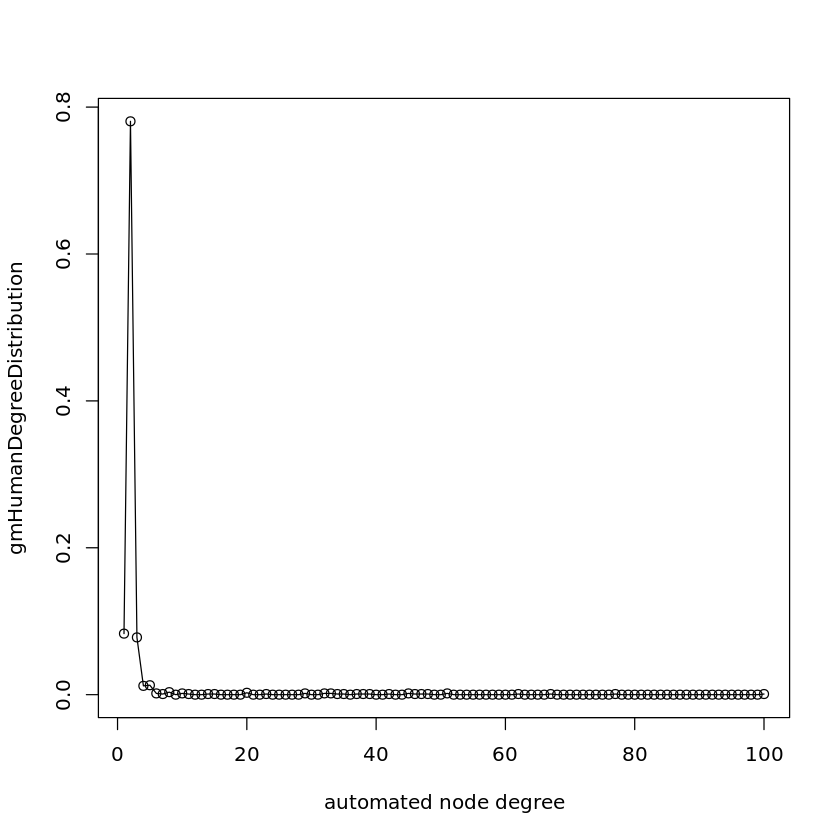

In [40]:
# First, need to load SNA functions and load data into statnet network object.
#    For more details on that, see the files "functions-sna.r",
#    "sna-load_data.r" and "sna-igraph_init.r".
#
# assumes that working directory for statnet is sourcenet/R/igraph
# setwd( ".." )
# source( "functions-sna.r" )
# source( "sna-load_data.r" )
# setwd( "igraph" )
# source( "sna-igraph-init.r" )

# results in (among other things):
# - humanNetworkData - data frame with human-generated network data matrix in it, including columns on the right side for any node-specific attributes.
# - calaisNetworkData - data frame with computer-generated network data matrix in it, including columns on the right side for any node-specific attributes.
# - humanNetworkTies - data frame with only human-generated network data matrix in it, no node-specific attributes.
# - calaisNetworkTies - data frame with only computer-generated network data matrix in it, no node-specific attributes.
# - humanNetworkMatrix - matrix with only human-generated network data matrix in it, no node-specific attributes.
# - calaisNetworkMatrix - matrix with only computer-generated network data matrix in it, no node-specific attributes.
# - humanNetworkIgraph - igraph network with human-coded network in it, including node-specific attributes.
# - calaisNetworkIgraph - igraph network with computer-coded network in it, including node-specific attributes.

# Links:
# - CRAN page: http://cran.r-project.org/web/packages/igraph/index.html
# - Manual (PDF): http://cran.r-project.org/web/packages/igraph/igraph.pdf
# - intro.: http://horicky.blogspot.com/2012/04/basic-graph-analytics-using-igraph.html
# - good notes: http://www.shizukalab.com/toolkits/sna/node-level-calculations

# Also, be advised that statnet and igraph don't really play nice together.
#    If you'll be using both, best idea is to have a workspace for each.

#==============================================================================#
# igraph
#==============================================================================#

# Good notes:
# - http://assemblingnetwork.wordpress.com/2013/06/10/network-basics-with-r-and-igraph-part-ii-of-iii/

# make sure you've loaded the igraph library
# install.packages( "igraph" )
library( igraph )

#==============================================================================#
# NODE level
#==============================================================================#

# calculate the mean of the degrees.
gmHumanDegreeMean <- gmHumanAvgDegree
paste( "degree mean = ", gmHumanDegreeMean, sep = "" )

# what is the standard deviation of these degrees?
gmHumanDegreeSd <- sd( gmHumanDegreeVector )
paste( "degree SD = ", gmHumanDegreeSd, sep = "" )

# what is the variance of these degrees?
gmHumanDegreeVar <- var( gmHumanDegreeVector )
paste( "degree Variance = ", gmHumanDegreeSd, sep = "" )

# what is the max value among these degrees?
gmHumanDegreeMax <- max( gmHumanDegreeVector )
paste( "degree Max Value = ", gmHumanDegreeSd, sep = "" )

# calculate and plot degree distributions
gmHumanDegreeFrequenciesTable <- table( gmHumanDegreeVector )
gmHumanDegreeDistribution <- igraph::degree.distribution( gmHumanNetworkIgraph )
plot( gmHumanDegreeDistribution, xlab = "automated node degree" )
lines( gmHumanDegreeDistribution )

# subset vector to get only those that are above mean
gmHumanAboveMeanVector <- gmHumanDegreeVector[ gmHumanDegreeVector > gmHumanDegreeMax ]

# node-level transitivity
# create transitivity vectors.
gmHumanTransitivityVector <- igraph::transitivity( gmHumanNetworkIgraph, type = "local" )

# append the transitivity to the network as a vertex attribute.
V( gmHumanNetworkIgraph )$transitivity <- gmHumanTransitivityVector

# also add transitivity vector to original data frame
gmHumanDataDF$transitivity <- gmHumanTransitivityVector


# And, if you want averages of these:
gmHumanMeanTransitivity <- mean( gmHumanTransitivityVector, na.rm = TRUE )

#==============================================================================#
# NETWORK level
#==============================================================================#

# graph-level degree centrality
gmHumanDegreeCentrality <- igraph::centralization.degree( gmHumanNetworkIgraph )

# graph-level undirected betweenness
gmHumanBetweennessCentrality <- igraph::centralization.betweenness( gmHumanNetworkIgraph, directed = FALSE )

# node-level undirected betweenness
gmHumanBetweenness <- gmHumanBetweennessCentrality$res

# graph-level transitivity
gmHumanTransitivity <- igraph::transitivity( gmHumanNetworkIgraph, type = "global" )

# graph-level density
gmHumanDensity <- igraph::graph.density( gmHumanNetworkIgraph )

#==============================================================================#
# output attributes to data frame
#==============================================================================#

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output igraph object to see what attributes you have
gmHumanNetworkIgraph

# then, combine them into a data frame.
gmHumanAttributeDF <- data.frame( id = V( gmHumanNetworkIgraph )$name,
                                  person_id = V( gmHumanNetworkIgraph )$person_id,
                                  person_type = V( gmHumanNetworkIgraph )$person_type,
                                  degree = V( gmHumanNetworkIgraph )$degree,
                                  transitivity = V( gmHumanNetworkIgraph )$transitivity )


# Save workspace image

- Back to [Table of Contents](#Table-of-Contents)

Save all the information in the current image, in case we need/want it later.

In [41]:
# help( save.image )
save.image( file = workspace_file_name )